In [1]:
from typing import List
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
import gzip
from tqdm import tqdm
import seaborn as sns
import natsort
from scipy.signal import savgol_filter
import hashlib
import random

In [2]:
folder_path = r"/home/kkumari/PhD/fish-data/fishSizeKinematics/data"
desired_cols = ['framenumber', 'real_fish_x', 'real_fish_y', 'real_fish_z', 'Stim_Flag', 'velocity','Stim_Flag_dir',]

processed_data_folder_path = r"/home/kkumari/PhD/fish-data/fishSizeKinematics/speed"

In [3]:
def makehistory(vec, nsteps, future=0):
    vec = np.asarray(vec).flatten()  # Ensure vec is a 1D array
    history = np.full((len(vec), nsteps + 1), np.nan)
    history[:, 0] = vec
    
    if future == 0:  # Shift to simulate past values
        for istep in range(1, nsteps + 1):
            history[istep:, istep] = vec[:-istep]
    else:  # Shift to simulate future values
        for istep in range(1, nsteps + 1):
            history[:-istep, istep] = vec[istep:]
    
    return history

def fivepoint(vec, dt):
    coeffMat = np.array([1, -8, 0, 8, -1])
    shiftedVec = makehistory(vec, 4)
    smoothedVec = np.dot(shiftedVec, coeffMat) / (12 * dt)
    diffVec = np.concatenate([smoothedVec[2:], [np.nan, np.nan]])
    
    return diffVec

def read_files(folder_path):
    return [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

def decompose_filename(df, column_name='filename'):
    pattern = r'(?P<date>\d{4})vr(?P<vr>\d)_(?P<trials>\d)_(?P<size>\d{3})_a(?P<age>\d{2})'
    df[['date', 'vr', 'trials', 'size', 'age']] = df[column_name].str.extract(pattern)
    return df

dt = 0.01

fish_data_list = read_files(folder_path)
processed_dfs = []

for file_path in fish_data_list:
    filename = os.path.splitext(os.path.basename(file_path))[0]
    print(filename)

    df = pd.read_csv(file_path, usecols=desired_cols)
    df['Stim_Flag'] = pd.to_numeric(df['Stim_Flag'], errors='coerce')
    df = df[df['Stim_Flag'].isin([6, 0, -1])]
    
    for col in ['real_fish_x', 'real_fish_y', 'real_fish_z']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna(subset=['real_fish_x', 'real_fish_y', 'real_fish_z'])
    
    dx = np.diff(df['real_fish_x'], prepend=np.nan)
    dy = np.diff(df['real_fish_y'], prepend=np.nan)
    dz = np.diff(df['real_fish_z'], prepend=np.nan)
    raw_speed = np.sqrt(dx**2 + dy**2 + dz**2) / dt

    df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
    df['filename'] = filename
    processed_dfs.append(df)

final_df = pd.concat(processed_dfs, ignore_index=True)
final_df = decompose_filename(final_df)
final_df.to_csv(os.path.join(processed_data_folder_path, "smoothed_velocity_fish_data.csv"), index=False)

3011vr4_2_076_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


3011vr5_1_071_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

3011vr3_3_071_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

0712vr5_2_064_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2711vr5_1_057_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2711vr3_4_112_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

0712vr4_3_099_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2911vr4_4_077_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2811vr5_2_083_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


0712vr5_4_064_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

0712vr4_2_099_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2811vr6_2_085_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


1012vr3_3_127_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2811vr4_1_065_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2911vr4_3_077_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2711vr5_4_057_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2811vr3_3_027_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


0712vr3_2_112_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2711vr6_2_088_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


0712vr6_1_084_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

3011vr3_1_071_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2711vr3_1_112_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

3011vr3_2_071_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2811vr6_3_085_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


3011vr5_3_071_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


1012vr3_4_127_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2711vr5_3_057_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

3011vr3_4_071_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

3011vr6_1_079_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2811vr6_1_085_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


3011vr6_2_079_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


1012vr5_3_104_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2911vr3_4_078_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2911vr3_2_078_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2811vr5_1_083_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


1012vr3_1_127_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


1012vr6_3_112_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


3011vr6_4_079_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


3011vr4_4_076_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

0712vr3_4_112_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

0712vr3_3_112_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2811vr4_3_065_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

0712vr4_1_099_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


3011vr6_3_079_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


2811vr4_4_065_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


1012vr5_2_104_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


2911vr3_3_078_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2911vr6_1_067_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)


0712vr3_1_112_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

3011vr5_2_071_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2711vr6_1_088_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


0712vr5_1_064_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2911vr6_2_067_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2711vr4_1_051_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

1012vr3_2_127_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2811vr5_3_083_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


1012vr6_4_112_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


0712vr5_3_064_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2711vr6_3_088_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2911vr5_1_070_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2911vr5_2_070_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2711vr4_4_051_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2711vr4_3_051_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


3011vr4_1_076_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

1012vr5_1_104_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2911vr3_1_078_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2811vr3_4_027_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


3011vr5_4_071_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

1012vr5_4_104_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


0712vr4_4_099_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


0712vr6_2_084_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


2911vr6_3_067_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

0712vr6_4_084_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2811vr3_2_027_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2811vr4_2_065_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2911vr5_4_070_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2911vr4_1_077_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2711vr5_2_057_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2911vr5_3_070_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2711vr4_2_051_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

1012vr6_1_112_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2811vr5_4_083_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2711vr6_4_088_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2711vr3_2_112_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

2711vr3_3_112_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


2911vr6_4_067_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


3011vr4_3_076_a27


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


2811vr3_1_027_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)


1012vr6_2_112_a30


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

0712vr6_3_084_a28


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


2811vr6_4_085_a25


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


2911vr4_2_077_a26


/tmp/ipykernel_368852/3549752586.py:40: DtypeWarning: Columns (10,11,12,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, usecols=desired_cols)
/tmp/ipykernel_368852/3549752586.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_368852/3549752586.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_speed'] = np.round(fivepoint(raw_speed, dt), 3)
/tmp/ipykernel_368852

In [4]:
# final_df = pd.read_csv('/home/kkumari/PhD/fish-data/fishSizeKinematics/speed/smoothed_velocity_fish_data.csv')

In [5]:
# convert speed to cm/s

final_df['smoothed_speed'] = final_df['smoothed_speed'] * 100


In [10]:
final_df.columns

Index(['framenumber', 'real_fish_x', 'real_fish_y', 'real_fish_z', 'velocity',
       'Stim_Flag', 'Stim_Flag_dir', 'smoothed_speed', 'filename', 'date',
       'vr', 'trials', 'size', 'age', 'fish_id', 'fish_letter', 'fish'],
      dtype='object')

In [9]:
import string

# Concatenate the 'date' and 'vr' columns to create a unique fish ID
final_df['fish_id'] = final_df['date'].astype(str) + '_' + final_df['vr'].astype(str)

# Generate a list of unique fish IDs
unique_fish_ids = final_df['fish_id'].unique()

# Create a mapping from unique fish IDs to letters (a, b, c, ...)
fish_id_to_letter = {fish_id: letter for fish_id, letter in zip(unique_fish_ids, string.ascii_lowercase)}

# Map each fish ID in the DataFrame to its corresponding letter
final_df['fish'] = final_df['fish_id'].map(fish_id_to_letter)

# Now, you can proceed with your analysis using 'fish_letter' as a unique identifier for each fish

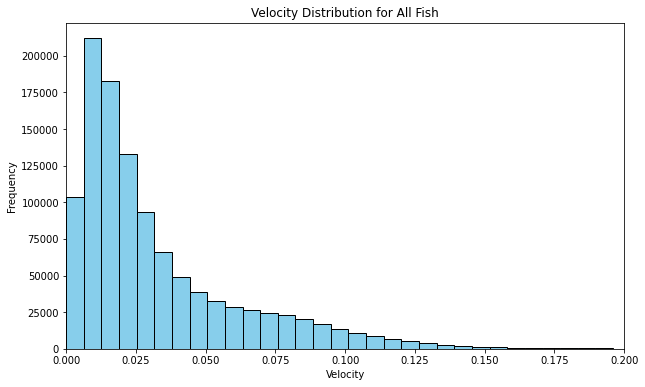

In [22]:
final_df['velocity'] = pd.to_numeric(final_df['velocity'], errors='coerce')

# Drop any rows where 'velocity' is NaN to ensure clean data for plotting
cleaned_df = final_df.dropna(subset=['velocity'])

# Plot a histogram of the velocity for all fish together
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['velocity'], bins=500, color='skyblue', edgecolor='black')
plt.title('Velocity Distribution for All Fish')
plt.xlabel('Velocity')
plt.ylabel('Frequency')
plt.xlim(0, 0.2)
plt.show()